# MATH 481A - Spring 2022
## Numerical Analysis

Jorge Balbas

<hr>

# Lab Assignment #1: Roots of Unity and Newton's Fractal

<hr>

### Due Date: Thursday 3/3/22

<hr>

### Directions:

1. Complete the problems below

1. Save the modified notebook

1. Upload it to canvas

<hr>

In this lab we will explore the behavior of Newton's method 

$$ z_{k + 1} = z_k - \frac{f(z_k)}{f'(z_k)}, \ \ k = 0, 1, 2, \dots$$

for solving the equation

$$ z^n - 1 = 0 $$

when points on the complex plane are chosen as initial values $x_0$ for the iteration.

The $n$ <em>roots of unity</em> satisfying $z^n = 1$ are given by

$$ z_m = \cos \left(\frac{2 \pi}{n} m \right) + i \sin \left(\frac{2 \pi}{n} m \right), \ \ \ \ \ m = 0, 1, \dots, n-1. $$

For $n = 3$, these are:

$$ z_0 = 1, \ \ \ \ \ z_1 = -\frac{1}{2} \left(1 - \sqrt{3}i \right), \ \ \ \ \ z_2 = -\frac{1}{2} \left(1 +  \sqrt{3}i \right).$$


The comments in the code below explain how to generate a fractal showing the Julia set for $f(z) = z^3 - 1.$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Problem 1. 

Write a Python function that takes as input the integer <tt>n</tt> and returns a 1d <tt>numpy</tt> array of length <tt>n</tt> holding the <tt>n</tt> roots of unity; that is, the <tt>n</tt> roots of the polynomial $z^n - 1 = 0$.

In [19]:
def RootsUnity(n):
    z = np.zeros(n, complex)
    
    for k in range(0,n):
        z[k] = math.cos(2.0*k*math.pi/n) + 1j*math.sin(2.0*k*math.pi/n)
    return z

z = RootsUnity(4)
print(z)

[ 1.0000000e+00+0.0000000e+00j  6.1232340e-17+1.0000000e+00j
 -1.0000000e+00+1.2246468e-16j -1.8369702e-16-1.0000000e+00j]


### Problem 2.

Write a Python function named <tt>nfractal</tt> that takes as input four arguments: <tt>K</tt>, <tt>pixel</tt>, <tt>tol</tt>, and <tt>n</tt>, and
1. generates a mesh of the complex plane consisting of <tt>pixel</tt> points along the $x$-axis and  <tt>0.75*pixel</tt> points along the $y$-axis, with $x, y \in [-1.5,1.5]$.<br><br>

1. applies the iteration $z_{k+1} = z_k - a \, (p(z_k) / p'(z_k))$ to each $z = x + iy$ on the mesh <tt>K</tt> times and records the number of times that the iterated value is within <tt>tol</tt> distance to one of the roots of the polynomial $p(z)$.<br><br>

1. colors each point in the mesh grid according to the number of times it is within a distance \verb!tol! of one of the roots of the polynomial $p(z)$.<br>

Apply the iteration for polynomials of the form $p(z) = z^n - 1$ for values of $n = 2, 3, 4$, and different (complex) values of $a$.  This will generate the *Julia Set* of the rational function $f(z) = z - a \, (p(z) / p'(z))$ for the polynomial $p(z)$.  Repeat the calculation for different values of <tt>pixel</tt>, <tt>K</tt>, and <tt>tol</tt>, and try different matplotlib color maps until you obtain a fractal you like.



In [26]:
def nfractal(K, pixel, tol):

#generates the newton fractal for a given polynomial

    r = 0.75; # ratio of number points along imaginary axis to number of points along real axis
    a = 0.8 + 0.5j;

    x_left = -1.5;
    x_right = 1.5;
    y_bottom = -1.5;
    y_top = 1.5;

    x = np.linspace(x_left, x_right, pixel)            # x / real coordinates
    y = np.linspace(y_bottom, y_top, round(pixel*r))   # y / imaginary coordinates

    [Re, Im] = np.meshgrid(x,y)                      # meshgrid
    C = np.zeros([round(r*pixel), pixel], complex)
    C = Re + Im*1.0j                                 # matrix holding x and y coordinates or points on complex plane

    B = np.zeros([round(r*pixel), pixel], float)     # this matrix keeps track of speed of convergence to a root if B(i,j) is large, iteration converges...
    Id = np.ones(B.shape)                            # matrix of ones

    #roots of polynomial to apply Newton's iteration to, in this case p(z) = z^3 - 1
    
    #n=4
    #z0 = 1.0
    #z1 = 6.1232340e-17+1.0000000e+00j # -0.5*(1.0 + math.sqrt(3.0)*1j)
    #z2 = -1.0000000e+00+1.2246468e-16j #-0.5*(1.0 - math.sqrt(3.0)*1j)
    #z3 = -1.8369702e-16-1.0000000e+00j
    
    #n=3
    z0 = 1.0
    z1 = -0.5+0.8660254j
    z2 = -0.5-0.8660254j
    
    #n=2
    #z0 = 1
    #z1 = -1

    Cn = C                        # initial guess for Newton's iteration

    # iterate the initial guess Cn K times, the iteration is applied to the
    # whole matrix using array element-by-element operations
    # second line inside the loop adds 1 to the entries of B if the
    # corresponding entry in matrix Cn remains close to a root of the
    # polynomial after the kth iteration

    for k in range(1, K):
        Cn -= a*(Cn**4 - Id) / (4.0*Cn**3)
        B += (np.abs(Cn - Id*z0) < tol) + 2.0*(np.abs(Cn - Id*z1) < tol) + 3.0*(np.abs(Cn - Id*z2) < tol)# + 4.0*(np.abs(Cn - Id*z3) < tol)

    # plot commands

    plt.figure(figsize=(10, 7.5))

    plt.subplot(111)
    plt.pcolormesh(x, y, B, cmap = 'gist_earth', shading = 'auto')
    plt.colorbar()
    
    outfile = "plots/nfractal_earth3.png"
    plt.savefig(outfile)

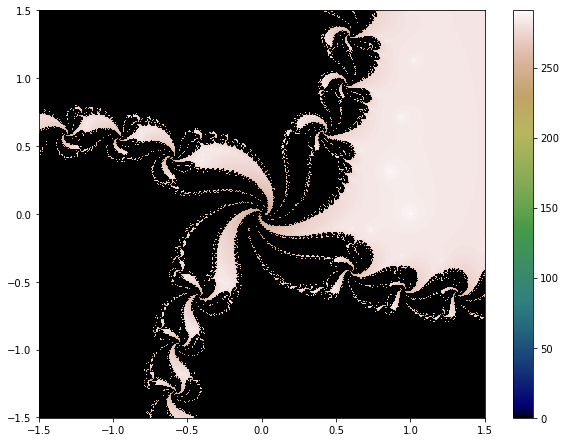

In [27]:
nfractal(300,800,1.0e-5)